**Group Details:**

2022BCD0038-K.Sri chaitan

2022BCD0041- Karthik Raj

2022BCD0021- Siddharth Chitikesi

# Optimization Paths for the Rosenbrock Function
This notebook demonstrates the paths taken by three different optimization methods—BFGS, Conjugate Gradient, and Newton's Method with damping—to minimize the Rosenbrock function. The Rosenbrock function is a well-known test problem for optimization algorithms, given by:

$$ f(x, y) = (1 - x)^2 + 100(y - x^2)^2 $$

Each optimization method is implemented with a line search or damping technique.

# Import Libraries

This cell imports the necessary libraries for the optimization process.

- `numpy` is used for numerical calculations.
- `matplotlib.pyplot` is used for plotting the optimization paths.

These libraries are essential for performing mathematical operations and visualizing the optimization paths on the Rosenbrock function.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock Function

The Rosenbrock function, also known as the Rosenbrock's valley or Rosenbrock's banana function, is a non-convex function used as a performance test problem for optimization algorithms. It has a global minimum inside a long, narrow, parabolic-shaped valley. The global minimum is at (1, 1), where the function value is zero.

The function is defined as:
f(x, y) = (1 - x)^2 + 100 * (y - x^2)^2

This function accepts a point (x, y) as input and returns the function value at that point.


In [2]:
# Define the Rosenbrock function
def rosenbrock_function(coords):
    x, y = coords
    return (1 - x)**2 + 100 * (y - x**2)**2

# Define the gradient of the Rosenbrock function
def rosenbrock_gradient(coords):
    x, y = coords
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

# Armijo Line Search Function

This cell defines the Armijo line search function, which adjusts the step size in each iteration to ensure sufficient decrease in the objective function. The Armijo condition helps prevent overshooting the minimum by controlling the step size.

Parameters:
- `func`: The function to minimize.
- `grad`: Gradient of the function at the current point.
- `pos`: Current position in the optimization process.
- `direction`: Descent direction determined by the optimization method.
- `alpha`: Initial step size (default is 1.0).
- `beta`: Step size reduction factor (default is 0.5).
- `sigma`: Parameter controlling the required decrease in function value (default is 1e-4).

The function iteratively reduces `alpha` until the Armijo condition is met, then returns the optimal step size.


In [3]:
def armijo_line_search(func, grad, pos, direction, alpha=1.0, beta=0.5, sigma=1e-4):
    """Perform Armijo line search to find the step size."""
    while func(pos + alpha * direction) > func(pos) + sigma * alpha * grad.dot(direction):
        alpha *= beta
    return alpha

# Backtracking Line Search Function

This cell defines the Backtracking Line Search function, a method for selecting an appropriate step size in optimization algorithms. The Backtracking Line Search iteratively reduces the step size until it satisfies the Armijo condition, ensuring sufficient decrease in the objective function. This technique helps prevent large steps that could destabilize the optimization process, especially in non-convex functions like the Rosenbrock function.

Parameters:
- `func`: The function to minimize.
- `grad`: The gradient of the function at the current position.
- `pos`: The current position in the optimization process.
- `direction`: The descent direction determined by the optimization method (e.g., gradient direction for gradient descent).
- `alpha`: Initial step size (default is 1.0).
- `rho`: Factor by which `alpha` is multiplied at each iteration (default is 0.8), typically a value between 0 and 1.
- `c`: Parameter for controlling the required decrease in function value based on the Armijo condition (default is 1e-4).

Steps:
1. Start with the initial step size `alpha`.
2. Check if the function value at the new position `pos + alpha * direction` is less than the current function value plus `c * alpha * np.dot(grad, direction)`, which satisfies the Armijo condition.
3. If the condition is not met, reduce the step size by multiplying it with `rho`.
4. Repeat the check until the Armijo condition is satisfied.
5. Return the optimal step size `alpha`.

This function is particularly useful in quasi-Newton methods like BFGS and damped Newton methods, as it adapts the step size to avoid overshooting the minimum and improves the stability of the convergence process.


In [4]:
# Backtracking line search function
def backtracking_line_search(func, grad, pos, direction, alpha=1.0, rho=0.5, c=1e-4):
    f_val = func(pos)
    grad_val = grad(pos)
    slope = grad_val.dot(direction)

    while func(pos + alpha * direction) > f_val + c * alpha * slope:
        alpha *= rho

    return alpha

# BFGS Optimization Function

This cell defines the BFGS (Broyden–Fletcher–Goldfarb–Shanno) optimization function. BFGS is a quasi-Newton method that approximates the inverse Hessian matrix, which is used to compute the descent direction. This method is widely used for smooth optimization problems.

Parameters:
- `func`: The function to minimize.
- `grad_func`: The gradient function of `func`.
- `start_pos`: Initial starting position (x, y).
- `tolerance`: Convergence tolerance based on gradient magnitude (default is 1e-5).
- `max_iterations`: Maximum number of iterations (default is 1000).

Steps:
1. Initialize the inverse Hessian approximation `B_inv` as the identity matrix.
2. Compute the gradient and check if it meets the convergence tolerance.
3. Calculate the descent direction using the inverse Hessian and gradient.
4. Adjust the step size using the Armijo line search to ensure stable convergence.
5. Update the position, gradient, and inverse Hessian approximation using BFGS formula if conditions are met.

The function returns the path taken by the optimization process for visualization.


In [5]:
def bfgs_optimization(func, grad_func, start_pos, tolerance=1e-5, max_iterations=1000):
    n = len(start_pos)
    pos = start_pos
    B_inv = np.eye(n)
    path = [pos.copy()]

    for _ in range(max_iterations):
        grad = grad_func(pos)
        if np.linalg.norm(grad) < tolerance:
            break

        # Compute search direction
        direction = -B_inv.dot(grad)

        # Line search for step size
        step_size = armijo_line_search(func, grad, pos, direction)

        # Update position
        new_pos = pos + step_size * direction
        s = new_pos - pos
        y = grad_func(new_pos) - grad

        # Update B_inv only if y.dot(s) is sufficiently large to avoid instability
        if y.dot(s) > 1e-10:
            rho = 1.0 / y.dot(s)
            B_inv = (B_inv - rho * np.outer(B_inv.dot(s), s).dot(B_inv) + rho * np.outer(y, y))

        pos = new_pos
        path.append(pos.copy())

    return np.array(path)

# Conjugate Gradient Optimization Function

This cell defines the Conjugate Gradient (CG) optimization function. The Conjugate Gradient method is an optimization algorithm that efficiently handles large-scale problems, especially those involving quadratic functions. It is typically used in situations where storing the Hessian matrix is impractical.

Parameters:
- `func`: The function to minimize.
- `grad_func`: The gradient function of `func`.
- `start_pos`: Initial starting position (x, y).
- `tolerance`: Convergence tolerance based on gradient magnitude (default is 1e-5).
- `max_iterations`: Maximum number of iterations (default is 1000).

Steps:
1. Initialize the starting position and calculate the initial gradient and search direction.
2. Perform a line search along the search direction to determine the optimal step size.
3. Update the position and compute the new gradient.
4. Adjust the search direction based on the new gradient and previous search direction using the Polak-Ribiere formula.
5. Repeat the process until convergence or reaching the maximum number of iterations.

The function returns the path taken by the Conjugate Gradient method, which can be visualized to observe how the method converges to the minimum of the Rosenbrock function.


In [6]:
# Conjugate Gradient Optimization
def conjugate_gradient_optimization(func, grad_func, start_pos, tolerance=1e-5, max_iterations=1000):
    pos = start_pos
    path = [pos.copy()]
    grad = grad_func(pos)
    direction = -grad

    for _ in range(max_iterations):
        if np.linalg.norm(grad) < tolerance:
            break

        # Backtracking line search for optimal step size
        step_size = backtracking_line_search(func, grad_func, pos, direction)
        new_pos = pos + step_size * direction
        new_grad = grad_func(new_pos)
        beta = max(0, new_grad.dot(new_grad - grad) / (grad.dot(grad) + 1e-10))
        direction = -new_grad + beta * direction
        pos, grad = new_pos, new_grad
        path.append(pos.copy())
    return np.array(path)

# Damped Newton Optimization Function

This cell defines the Damped Newton optimization function. Newton's Method uses the Hessian matrix to determine the direction and magnitude of the optimization step, allowing for rapid convergence. In this implementation, we use a "damping" factor to control the step size, stabilizing the method in cases where the Hessian may be near-singular or poorly conditioned.

Parameters:
- `func`: The function to minimize.
- `grad_func`: The gradient function of `func`.
- `hess_func`: The Hessian function of `func`.
- `start_pos`: Initial starting position (x, y).
- `tolerance`: Convergence tolerance based on gradient magnitude (default is 1e-5).
- `max_iterations`: Maximum number of iterations (default is 1000).
- `damping_factor`: Factor to scale the Newton step, providing stability (default is 0.5).

Steps:
1. Initialize the starting position and compute the gradient and Hessian.
2. Calculate the Newton step by solving the system involving the Hessian and gradient.
3. Scale the step by the damping factor to avoid overshooting, especially in regions with a poorly conditioned Hessian.
4. Update the position based on the damped Newton step.
5. Repeat the process until the gradient magnitude meets the convergence tolerance or the maximum number of iterations is reached.

The function returns the path taken by the Damped Newton method, which can be plotted to show its convergence path toward the global minimum of the Rosenbrock function.


In [7]:
# Damped Newton's method
def damped_newtons_method(func, grad_func, hessian_func, start_pos, tolerance=1e-5, damping_factor=0.1):
    pos = start_pos
    path = [pos.copy()]
    while np.linalg.norm(grad_func(pos)) > tolerance:
        grad = grad_func(pos)
        hessian = hessian_func(pos) + damping_factor * np.eye(len(start_pos))
        delta = np.linalg.solve(hessian, -grad)
        pos = pos + delta
        path.append(pos.copy())
    return np.array(path)

# Hessian function for Rosenbrock with damping
def rosenbrock_hessian_damped(coords, a=1, b=100):
    x, y = coords
    hess_xx = 2 - 4 * b * y + 12 * b * x ** 2
    hess_xy = -4 * b * x
    hess_yy = 2 * b
    return np.array([[hess_xx, hess_xy], [hess_xy, hess_yy]])

# Generate Optimization Paths and Plot Results

In this cell, we:
1. Create a grid of x and y values for contour plotting of the Rosenbrock function.
2. Plot the optimization paths for BFGS, Conjugate Gradient, and Newton's Method on the contour plot of the Rosenbrock function.
3. Display the starting points and final converged points for each method.

Each method's path helps visualize its unique convergence behavior toward the global minimum of the Rosenbrock function.


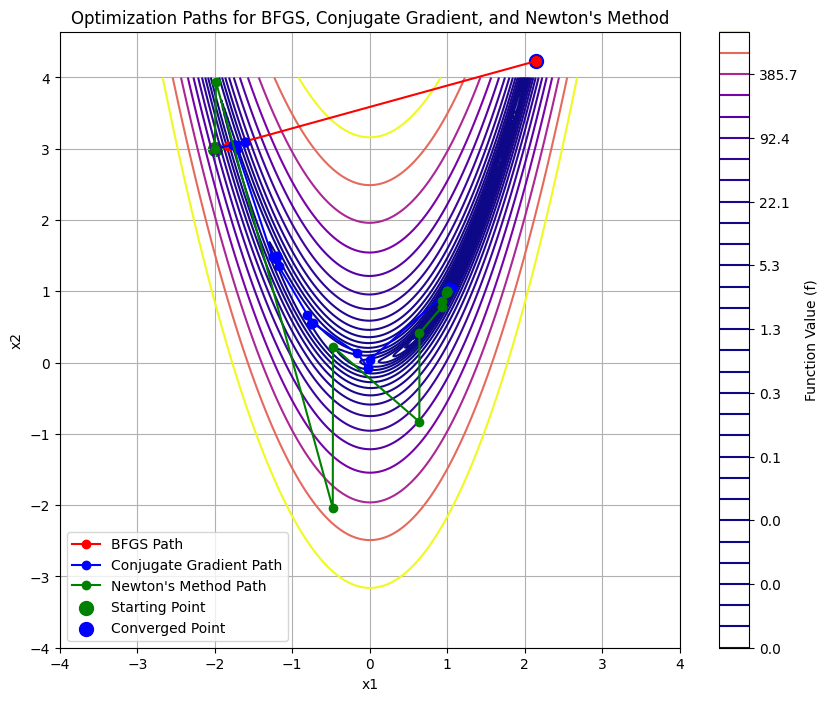

In [8]:
# Define the grid and Rosenbrock function contour
x_vals = np.linspace(-4, 4, 400)
y_vals = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.vectorize(lambda x, y: rosenbrock_function([x, y]))(X, Y)

# Initial point for all methods
initial_point = np.array([-2.0, 3.0])

# Run optimization functions
bfgs_path = bfgs_optimization(rosenbrock_function, rosenbrock_gradient, initial_point)
cg_path = conjugate_gradient_optimization(rosenbrock_function, rosenbrock_gradient, initial_point)
newton_path = damped_newtons_method(rosenbrock_function, rosenbrock_gradient, rosenbrock_hessian_damped, initial_point)

# Plot all paths
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(-3, 3, 30), cmap='plasma')
plt.colorbar(label="Function Value (f)")

# Plot paths for each optimization algorithm
plt.plot(bfgs_path[:, 0], bfgs_path[:, 1], 'ro-', label="BFGS Path")
plt.plot(cg_path[:, 0], cg_path[:, 1], 'bo-', label="Conjugate Gradient Path")
plt.plot(newton_path[:, 0], newton_path[:, 1], 'go-', label="Newton's Method Path")

plt.scatter(bfgs_path[0, 0], bfgs_path[0, 1], color='green', s=100, label="Starting Point")
plt.scatter(bfgs_path[-1, 0], bfgs_path[-1, 1], color='blue', s=100, label="Converged Point")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Optimization Paths for BFGS, Conjugate Gradient, and Newton's Method")
plt.grid(True)
plt.show()

**Done by 2022BCD0038- K.Sri Chaitan**